In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [7]:
# 什麼樣的車評價好？ which feature?

In [8]:
f = open ('/Users/tsaifeng-ren/Documents/hometeach/car.names','r',encoding='UTF-8')
a = open ('/Users/tsaifeng-ren/Documents/hometeach/car.data','r',encoding='UTF-8')
car_names = f
car_data = a

In [9]:
a = pd.read_csv('/Users/tsaifeng-ren/Documents/hometeach/car_evaluation.csv')
car_data = pd.DataFrame(a)
list(car_data.columns)
car_data = car_data.rename(columns={'vhigh':'buying_price','vhigh.1':'maint_price','2':'num_doors',
                             '2.1':'num_person','small':'lug_boots','low':'safety','unacc':'acceptability'})
display(car_data)

,buying_price,maint_price,num_doors,num_person,lug_boots,safety,acceptability
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [10]:
car_data.describe()

,buying_price,maint_price,num_doors,num_person,lug_boots,safety,acceptability
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,med,med,3,4,med,med,unacc
freq,432,432,432,576,576,576,1209


In [11]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   buying_price   1727 non-null   object
 1   maint_price    1727 non-null   object
 2   num_doors      1727 non-null   object
 3   num_person     1727 non-null   object
 4   lug_boots      1727 non-null   object
 5   safety         1727 non-null   object
 6   acceptability  1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [12]:
for col in car_data.columns:
    print(car_data[col].value_counts())

med      432
low      432
high     432
vhigh    431
Name: buying_price, dtype: int64
med      432
low      432
high     432
vhigh    431
Name: maint_price, dtype: int64
3        432
5more    432
4        432
2        431
Name: num_doors, dtype: int64
4       576
more    576
2       575
Name: num_person, dtype: int64
med      576
big      576
small    575
Name: lug_boots, dtype: int64
med     576
high    576
low     575
Name: safety, dtype: int64
unacc    1209
acc       384
good       69
vgood      65
Name: acceptability, dtype: int64


In [13]:
x = car_data.drop(['acceptability'],axis = 1)
y = car_data['acceptability']

In [14]:
def price_to_float(x):
    if x == 'vhigh':
        return (3)
    if x =='high':
        return (2)
    if x =='med':
        return(1)
    if x =='low':
        return(0)
    if x =='small':
        return(0)
    if x =='big':
        return(2)
def numberdoor_to_ce(x):
    if x == '2':
        return(0)
    if x =='3':
        return(1)
    if x =='4':
        return(2)
    if x =='5more':
        return(3)
def numberper_to_ce(x):
    if x == '2':
        return(0)
    if x =='4':
        return(1)
    if x =='more':
        return(2)
x['buying_price'] = x['buying_price'].apply(price_to_float)
x['maint_price'] = x['maint_price'].apply(price_to_float)
x['lug_boots'] = x['lug_boots'].apply(price_to_float)
x['safety'] = x['safety'].apply(price_to_float)
x['num_doors'] = x['num_doors'].apply(numberdoor_to_ce)
x['num_person'] = x['num_person'].apply(numberper_to_ce)

In [15]:
display(x)

,buying_price,maint_price,num_doors,num_person,lug_boots,safety
0,3,3,0,0,0,1
1,3,3,0,0,0,2
2,3,3,0,0,1,0
3,3,3,0,0,1,1
4,3,3,0,0,1,2
...,...,...,...,...,...,...
1722,0,0,3,2,1,1
1723,0,0,3,2,1,2
1724,0,0,3,2,2,0
1725,0,0,3,2,2,1


In [16]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.1, random_state=4)

In [17]:
from sklearn.metrics import log_loss
from sklearn.tree import DecisionTreeClassifier
car_clf = DecisionTreeClassifier(max_depth=11) #
car_clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=11)

In [18]:
training_loss = []
test_loss = []
def tree_scores(i):
    clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=i, random_state = 3)
    clf_gini.fit(x_train, y_train)
    y_pred_gini = clf_gini.predict_proba(x_test)
    y_pred_train_gini = clf_gini.predict_proba(x_train)
    training_loss.append(log_loss(y_train, y_pred_train_gini))
    test_loss.append(log_loss(y_test, y_pred_gini))

In [19]:
for i in range(1,15):
    tree_scores(i)

In [20]:
len(training_loss)

14

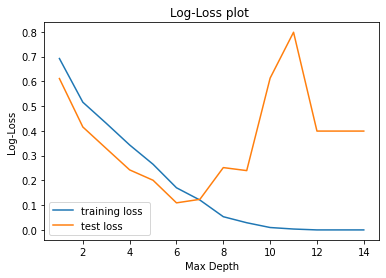

In [21]:
s = [1,2,3,4,5,6,7,8,9,10,11,12,13,14]
# plotting the line 1 points 
plt.plot(s, training_loss, label = "training loss ")
# plotting the line 2 points 
plt.plot(s, test_loss, label = "test loss ")
plt.xlabel('Max Depth')
# Set the y axis label of the current axis.
plt.ylabel('Log-Loss')
# Set a title of the current axes.
plt.title('Log-Loss plot ')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

In [22]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=7, random_state = 42)
clf_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=7, random_state=42)

In [23]:
print(clf_gini.score(x_train, y_train))
print(clf_gini.score(x_test, y_test))

0.9382239382239382
0.9479768786127167


In [24]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import tree
import graphviz

dot_data = tree.export_graphviz(clf_gini, out_file=None, 
                              feature_names=x_train.columns,  
                              class_names=y_train,  
                              filled=True, rounded=True,  
                              special_characters=True)
graph = graphviz.Source(dot_data) 
graph 

ExecutableNotFound: failed to execute ['dot', '-Kdot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

In [30]:
g = y
g = pd.DataFrame(g)
def accept_float(x):
    if x == 'unacc':
        return(0)
    if x =='acc':
        return(1)
    if x =='good':
        return(2)
    if x =='vgood':
        return(3)
g['acceptability'] = g['acceptability'].apply(accept_float)

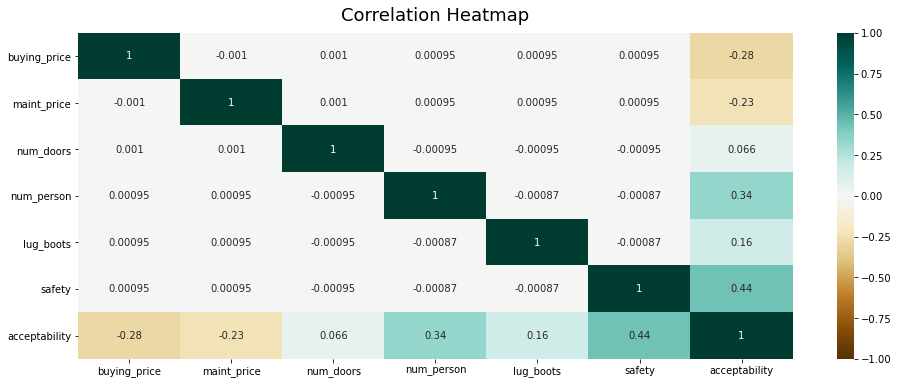

In [31]:
c = pd.concat([x,g],axis=1)
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(c.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
# save heatmap as .png file
# dpi - sets the resolution of the saved image in dots/inches
# bbox_inches - when set to 'tight' - does not allow the labels to be cropped
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')